In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import QuantileTransformer

In [2]:
df = pd.read_excel(r'C:\Users\Mln\jupyter-lab\random_test\mindset\task\Задача.xlsx')

print(df.head())

   Персона  Возраст, лет  Стаж вождения, лет  Убыточность, %  \
0  6-LLJEH            20                   1             263   
1  2-GLHFG            74                  51             107   
2  6-FJFKL            27                   1             165   
3  4-KJEJL            24                   6             348   
4  5-JFFGH            26                   3             286   

   Уровень заработной платы, руб/год  
0                             716693  
1                             274393  
2                             723841  
3                             139419  
4                             650003  


In [3]:
df = df.drop(['Персона'], axis=1) # удаляю признаки которые не буду рассматривать

## Model building

In [4]:
x = df[['Убыточность, %', 'Уровень заработной платы, руб/год']]

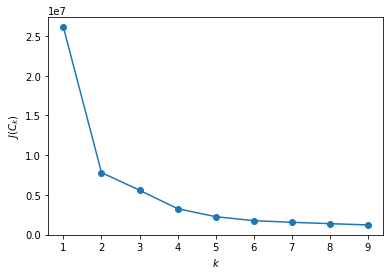

In [17]:
inertia = []
for k in range(1, 10):
    k_means = KMeans(n_clusters=k, random_state=42).fit(x)
    inertia.append(np.sqrt(k_means.inertia_))
    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

In [27]:
model = KMeans(n_clusters=4, init='k-means++')
model.fit(x)

KMeans(n_clusters=4)

In [28]:
y_predicted = model.fit_predict(x) # предсказываю значения

In [29]:
df['cluster'] = y_predicted #добовляю новую колонку в датафрейм
df

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год",cluster
0,20,1,263,716693,0
1,74,51,107,274393,2
2,27,1,165,723841,0
3,24,6,348,139419,2
4,26,3,286,650003,0
...,...,...,...,...,...
479,67,31,102,3630438,3
480,67,44,189,232022,2
481,20,5,285,622134,0
482,49,38,65,3607848,3


In [30]:
df['cluster'] = df['cluster'].astype(object) #change the data type
df.head()

,"Возраст, лет","Стаж вождения, лет","Убыточность, %","Уровень заработной платы, руб/год",cluster
0,20,1,263,716693,0
1,74,51,107,274393,2
2,27,1,165,723841,0
3,24,6,348,139419,2
4,26,3,286,650003,0


In [31]:
df['cluster'].unique()

array([0, 2, 1, 3], dtype=object)

In [32]:
X = x.values

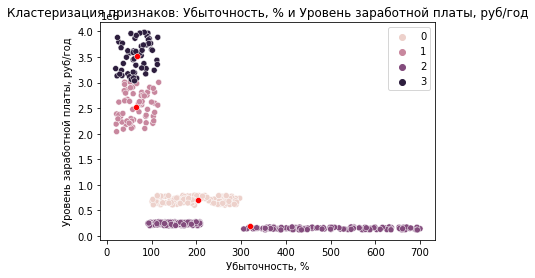

In [33]:
sns.scatterplot(x = x.iloc[:,0], y = x.iloc[:,1], data=df, hue=df['cluster']) # строю график с классами

sns.scatterplot(x = model.cluster_centers_[:, 0], y = model.cluster_centers_[:, 1], color='red') # добавляю на график центроиды

plt.title('Кластеризация признаков: Убыточность, % и Уровень заработной платы, руб/год'.format(x))

plt.legend()
plt.show()

In [34]:
output = pd.DataFrame(data=y_predicted) # создаю датафрейм с предсказанными классами
output[0].value_counts(ascending=False) #количество наблюдений в каждом классе

2    242
0    121
1     66
3     55
Name: 0, dtype: int64

In [35]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # убираем в выводе экспоненту
df.groupby('cluster')[['Убыточность, %', 'Уровень заработной платы, руб/год']].mean()

,"Убыточность, %","Уровень заработной платы, руб/год"
cluster,,
0,203.025,700447.281
1,64.788,2526266.409
2,319.760,196210.033
3,66.909,3521699.509


На основе предложенных данных видно, что убыточность зависит от уровня заработной платы в год. 
Чем выше уровень заработной платы, тем меньше показатель убыточности и наоборот, чем ниже зарплата у персоны, тем выше показатель убыточности. 

Данные разбиты на две группы: 

1. Люди с высоким годовым доходом (0 кластер)
2. Люди со средным и ниже среднего годовым доходом (1 кластер)

Первый кластер - люди с средним/низким годовым доходом, средняя убыточность в этом кластере составляет 280.848%, а среднее число годовой запралаты 364289.116 рублей. 
Могу предположить почему люди с низким годовым доходом имеют высокие показатели убыточности. Допустим, рассмотрим водителя курьера или же водителя маршрутных транспротных средств, при такой работе: частое взаимодействие с авто или другим видом транспортного средства, возрастает значение риска попасть в ДТП, скорее всего это и проявляется в высоком показателе убыточности.

Вторая группа - люди с высоким годовым доходом, средняя убыточность в этом кластере составляет 65.752%, а среднее число годовой запралаты 2978736 рублей. 
Предполагаю, что люди с высоким годовым доходом проводят меньше времени на дорогах общего пользования, поэтому этот кластер обладает самым низким показателем убыточности.

In [38]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))